## EDA - Exploratory Data Analysis

### Steps
#### - Attributes in the data.
#### - Size of the data.
#### - Sanity Check (get rid of irrelevant columns)
#### - Type checking and typecasting if require
#### - Check for missing values
#### - Check for the outliers (extreme values)
#### - Encoding (conversion of non-numeric to numeric)
#### - Check for the duplicates

In [1]:
# Importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the file
file_name='Loan_data.csv'

In [3]:
# Reading the file
df_raw=pd.read_csv(file_name)

In [4]:
# Creating a copy
df=df_raw.copy()

In [5]:
# Checking the table
df.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [6]:
# Checking the shape of the table
df.shape

(2200, 15)

In [7]:
# Sanity Check
# Get rid of irrevalant columns 
# Get the columns name coreect

In [8]:
# Fixing the columns name
df.columns=df.columns.str.replace('.','_').str.lower()
df.columns

Index(['id', 'amount_requested', 'amount_funded_by_investors', 'interest_rate',
       'loan_length', 'loan_purpose', 'debt_to_income_ratio', 'state',
       'home_ownership', 'monthly_income', 'fico_range', 'open_credit_lines',
       'revolving_credit_balance', 'inquiries_in_the_last_6_months',
       'employment_length'],
      dtype='object')

In [9]:
# removing irrevalant columns
cols=['id', 'state', 'inquiries_in_the_last_6_months']
df.drop(columns=cols, inplace=True)
df.columns

Index(['amount_requested', 'amount_funded_by_investors', 'interest_rate',
       'loan_length', 'loan_purpose', 'debt_to_income_ratio', 'home_ownership',
       'monthly_income', 'fico_range', 'open_credit_lines',
       'revolving_credit_balance', 'employment_length'],
      dtype='object')

In [10]:
# Type checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   amount_requested            2199 non-null   object 
 1   amount_funded_by_investors  2199 non-null   object 
 2   interest_rate               2200 non-null   object 
 3   loan_length                 2199 non-null   object 
 4   loan_purpose                2199 non-null   object 
 5   debt_to_income_ratio        2199 non-null   object 
 6   home_ownership              2199 non-null   object 
 7   monthly_income              2197 non-null   float64
 8   fico_range                  2200 non-null   object 
 9   open_credit_lines           2196 non-null   object 
 10  revolving_credit_balance    2197 non-null   object 
 11  employment_length           2131 non-null   object 
dtypes: float64(1), object(11)
memory usage: 206.4+ KB


In [11]:
#Fixing the column values

# amount_requested 
df.loc[df.amount_requested=='.', 'amount_requested']=np.nan
df.amount_requested=df.amount_requested.astype(float)

# amount_funded_by_investor 
df.amount_funded_by_investors=pd.to_numeric(df.amount_funded_by_investors, errors='coerce')

# interest_rate
df.interest_rate=df.interest_rate.str.strip('%').astype(float)

# loan_length
df.loan_length=pd.to_numeric(df.loan_length.str.strip(' months'), errors='coerce')

# debt_to_income_ratio
df.debt_to_income_ratio=pd.to_numeric(df.debt_to_income_ratio.str.strip('%'), errors='coerce')

# fico_range
def clean_fico_range(val):
    low, high=val.split('-')
    low=int(low)
    high=int(high)
    return (low+high)/2
df.fico_range=df.fico_range.apply(clean_fico_range)

# open_credit_lines
df.open_credit_lines=pd.to_numeric(df.open_credit_lines, errors='coerce')

# revoling_credit
df.revolving_credit_balance=pd.to_numeric(df.revolving_credit_balance, errors='coerce')

# employment_length
df.employment_length=pd.to_numeric(df.employment_length.replace({'10+ years':11, '< 1 year':.5}).replace(r'[^0-9.]', '', regex=True), errors='coerce')

In [12]:
# Type checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   amount_requested            2195 non-null   float64
 1   amount_funded_by_investors  2196 non-null   float64
 2   interest_rate               2200 non-null   float64
 3   loan_length                 2198 non-null   float64
 4   loan_purpose                2199 non-null   object 
 5   debt_to_income_ratio        2199 non-null   float64
 6   home_ownership              2199 non-null   object 
 7   monthly_income              2197 non-null   float64
 8   fico_range                  2200 non-null   float64
 9   open_credit_lines           2193 non-null   float64
 10  revolving_credit_balance    2195 non-null   float64
 11  employment_length           2130 non-null   float64
dtypes: float64(10), object(2)
memory usage: 206.4+ KB


In [13]:
# Missing values handling

In [14]:
#Checking nan values in each column
df.isna().sum()

amount_requested               5
amount_funded_by_investors     4
interest_rate                  0
loan_length                    2
loan_purpose                   1
debt_to_income_ratio           1
home_ownership                 1
monthly_income                 3
fico_range                     0
open_credit_lines              7
revolving_credit_balance       5
employment_length             70
dtype: int64

In [15]:
# Deleting nan values
df.dropna()

# Grouping numerical columns
num_cols=['amount_requested', 'amount_funded_by_investors', 'interest_rate','debt_to_income_ratio',
    'monthly_income', 'fico_range', 'open_credit_lines', 'revolving_credit_balance']

# Grouping categorical columns
cat_cols=[col for col in df.columns if col not in num_cols]

# num_cols - mean
def impute_with_mean(col):
    df[col]=df[col].fillna(df[col].mean())
for col in num_cols:
    impute_with_mean(col)

# cat_cols - mode
def impute_with_mode(col):
    df[col]=df[col].fillna(df[col].mode().iloc[0])
for col in cat_cols:
    impute_with_mode(col)

In [16]:
#Checking nan values in each column
df.isna().sum()

amount_requested              0
amount_funded_by_investors    0
interest_rate                 0
loan_length                   0
loan_purpose                  0
debt_to_income_ratio          0
home_ownership                0
monthly_income                0
fico_range                    0
open_credit_lines             0
revolving_credit_balance      0
employment_length             0
dtype: int64

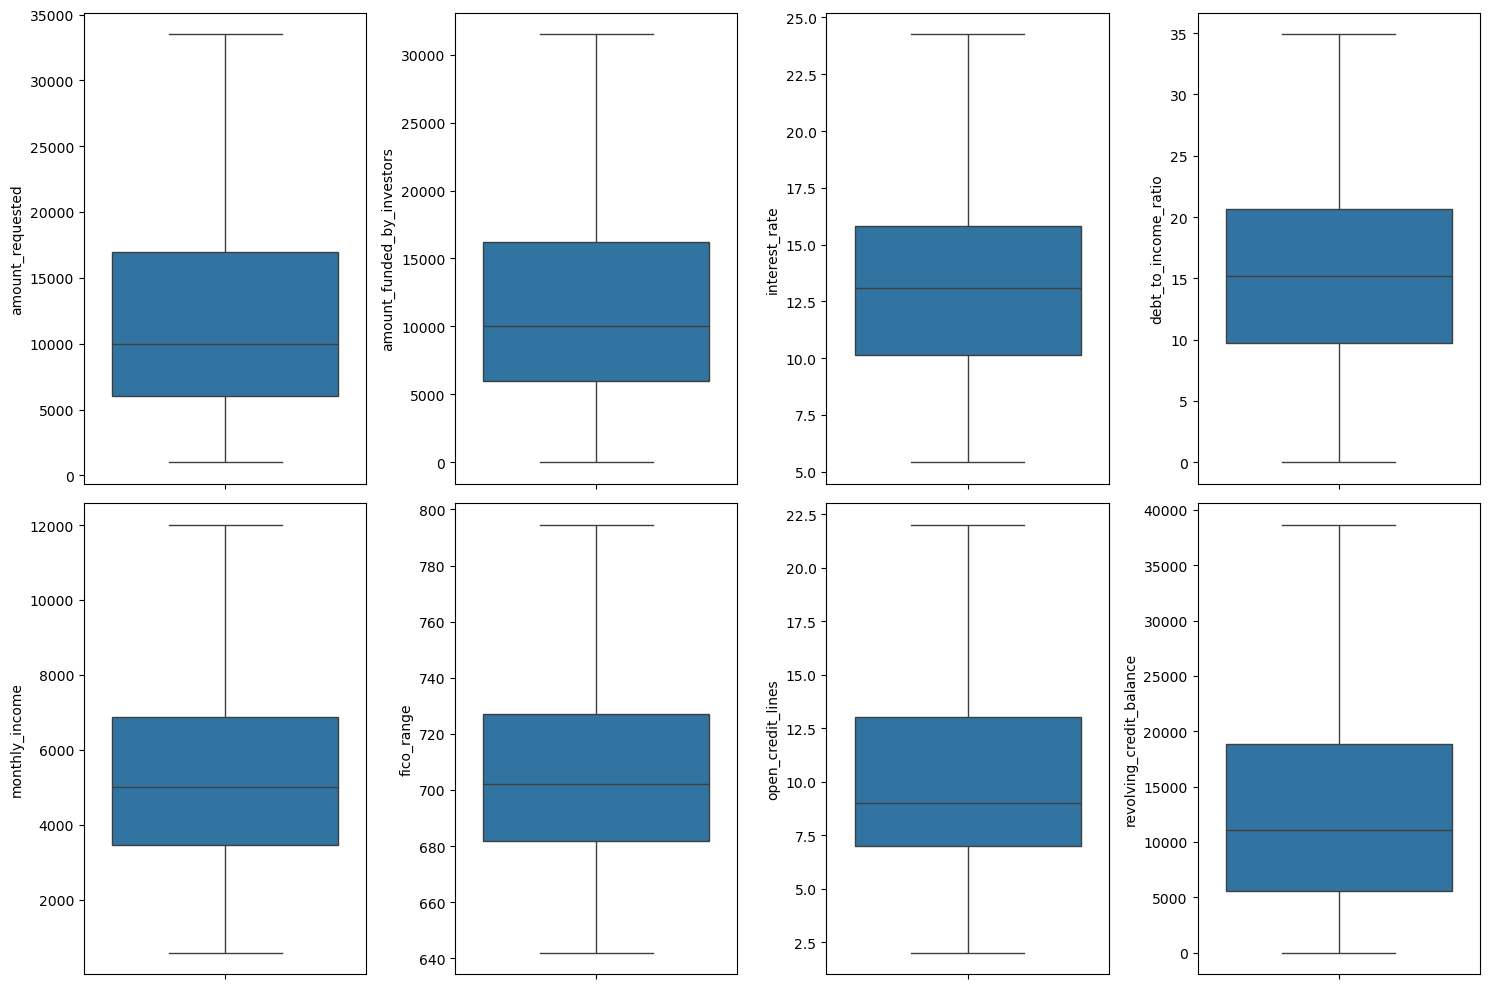

In [23]:
# Handling the outliners 
f,a=plt.subplots(2,4, figsize=(15,10), dpi=100)
ind=0
for i in range(2):
    for j in range(4):
        sns.boxplot(data=df, y=num_cols[ind], ax=a[i,j])
        ind+=1

    plt.tight_layout()

# sns.boxplot(data=df, y=num_cols[0], ax=a[0,0])
# sns.boxplot(data=df, y=num_cols[1], ax=a[0,1])
# plt.tight_layout()

plt.show()

amount_requested
amount_funded_by_investors
interest_rate
debt_to_income_ratio
monthly_income
fico_range
open_credit_lines
revolving_credit_balance


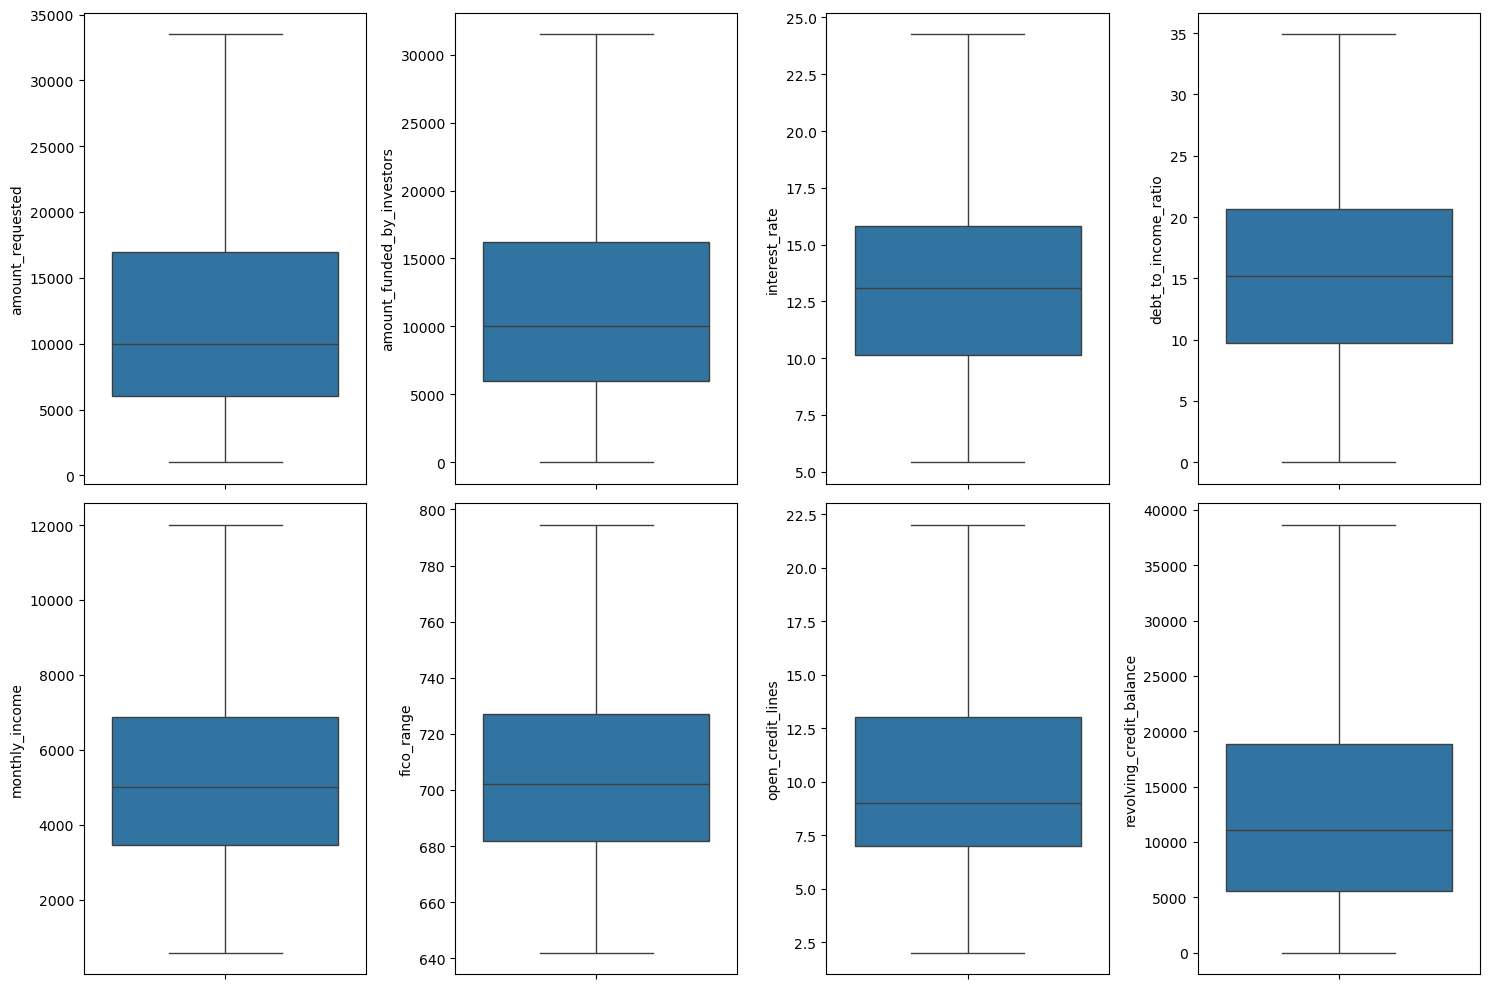

In [18]:
# Treating the outliners
def cap_outliers(col):
    print(col)
    q1=df[col].quantile(.25)
    q3=df[col].quantile(.75)
    # print('q1-',q1)
    # print('q3-', q3)
    iqr=q3-q1
    # print('iqr-',iqr)
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    # print('lower-',lower)
    # print('upper-', upper)

    df[col]=df[col].clip(lower, upper)

for col in num_cols:
    cap_outliers(col)

f,a=plt.subplots(2,4, figsize=(15,10), dpi=100)
ind=0
for i in range(2):
    for j in range(4):
        sns.boxplot(data=df, y=num_cols[ind], ax=a[i,j])
        ind+=1

    plt.tight_layout()

# sns.boxplot(data=df, y=num_cols[0], ax=a[0,0])
# sns.boxplot(data=df, y=num_cols[1], ax=a[0,1])
# plt.tight_layout()

plt.show()

In [19]:
# Encoding

# Splitting the data into numeric
num_df=df.select_dtypes(include='number')

# Splitting the data into non numeric
obj_df=df.select_dtypes(include='object')

# Applying Label encoding for loan purpose 
obj_df.loan_purpose=obj_df.loan_purpose.astype('category').cat.codes

# Applying One hot encoding for home ownership 
obj_df=pd.get_dummies(obj_df, columns=['home_ownership'],dtype=int)

# Concatenate numeric and non numeric data types along a axis
num_data=pd.concat((num_df, obj_df), axis=1)

# Checking concatenated data types
num_data.dtypes

amount_requested              float64
amount_funded_by_investors    float64
interest_rate                 float64
loan_length                   float64
debt_to_income_ratio          float64
monthly_income                float64
fico_range                    float64
open_credit_lines             float64
revolving_credit_balance      float64
employment_length             float64
loan_purpose                     int8
home_ownership_MORTGAGE         int32
home_ownership_NONE             int32
home_ownership_OTHER            int32
home_ownership_OWN              int32
home_ownership_RENT             int32
dtype: object

In [20]:
# Handling Duplicated values
num_data.duplicated().sum()

0

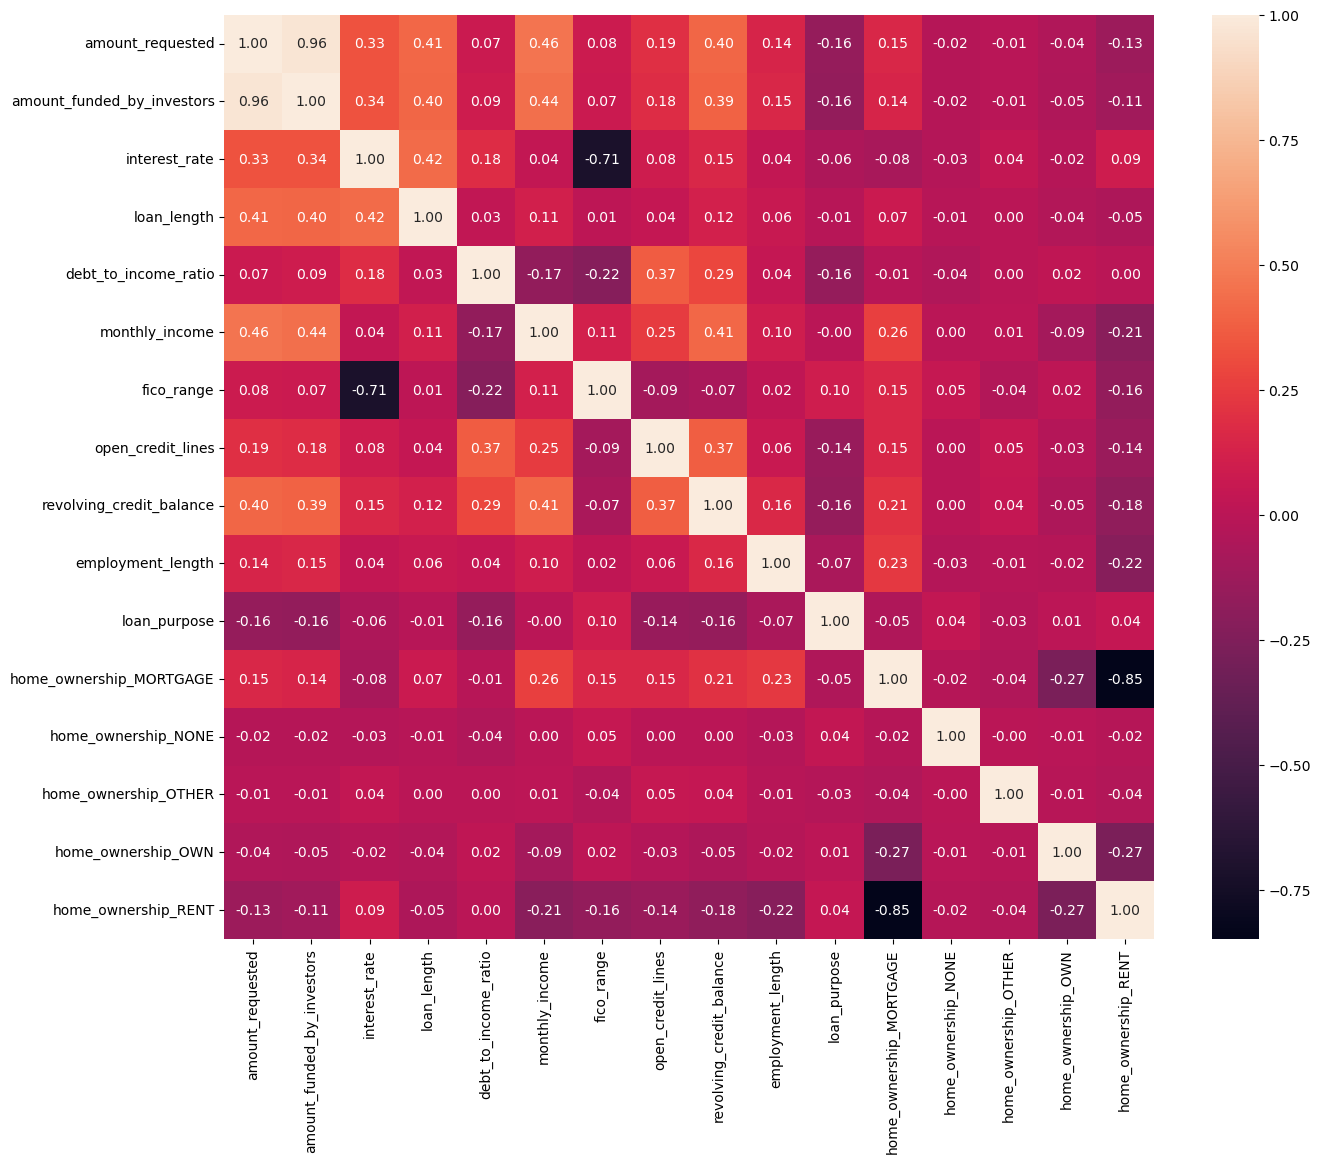

In [21]:
# plotting the correlation
plt.figure(figsize=(15,12), dpi=100)
sns.heatmap(num_data.corr(), annot=True, fmt='.2f')
plt.show()

In [24]:
# Exporting the cleaned and encoded data
num_df.to_excel('cleaned_and_encoded_data.xlsx', index=False)